In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm as tqdm
import cv2
import warnings
warnings.filterwarnings("ignore")

In [5]:
train_dir="/content/dataset_for_intership1/DATASET/TRAIN"
test_dir="/content/dataset_for_intership1/DATASET/TEST"

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from glob import glob

In [7]:
x1_data=[]
y1_data=[]
for category in glob(train_dir+'/*'):
    for file in tqdm.tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x1_data.append(img_array)
        y1_data.append(category.split('/')[-1])
data=pd.DataFrame({"image":x1_data,"label":y1_data})

100%|██████████| 9999/9999 [00:03<00:00, 2538.24it/s]


([<matplotlib.patches.Wedge at 0x7d9ac1ec5910>,
 [Text(-0.546089972270482, -0.9548747259120561, 'Organic'),
  Text(0.5460898828686557, 0.9548747770406851, 'Recycle')],
 [Text(-0.297867257602081, -0.5208407595883943, '55.69%'),
  Text(0.2978672088374485, 0.5208407874767372, '44.31%')])

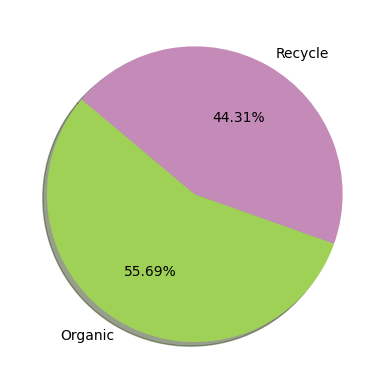

In [8]:
colors=['#a0d157','#c48bb8']
plt.pie(data.label.value_counts() ,labels=['Organic','Recycle'],autopct='%0.2f%%',colors=colors,shadow=True, startangle=140)

In [29]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [9]:
image_size=(224,224)
batch_size=32

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    fill_mode="nearest"
)

test_datagen= ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.regularizers import l2

model = Sequential([

    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),


    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),


    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),


    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),


    GlobalAveragePooling2D(),


    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 259,010 (1011.76 KB)

 Trainable params: 258,306 (1009.01 KB)

 Non-trainable params: 704 (2.75 KB)

In [13]:
print("Train generator samples:", train_generator.samples)
print("Test generator samples:", test_generator.samples)


Train generator samples: 22564
Test generator samples: 2513


In [14]:
steps_per_epoch = train_generator.samples // batch_size
validation_steps = test_generator.samples // batch_size

In [15]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-7)


In [16]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50,
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 334s 455ms/step - accuracy: 0.7931 - loss: 0.5847 - val_accuracy: 0.5674 - val_loss: 0.9822 - learning_rate: 0.0010
Epoch 2/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 316s 449ms/step - accuracy: 0.8349 - loss: 0.4417 - val_accuracy: 0.7131 - val_loss: 0.6040 - learning_rate: 0.0010
Epoch 3/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 313s 444ms/step - accuracy: 0.8546 - loss: 0.3803 - val_accuracy: 0.8512 - val_loss: 0.3607 - learning_rate: 0.0010
Epoch 4/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 312s 442ms/step - accuracy: 0.8646 - loss: 0.3454 - val_accuracy: 0.8953 - val_loss: 0.2829 - learning_rate: 0.0010
Epoch 5/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 314s 444ms/step - accuracy: 0.8680 - loss: 0.3323 - val_accuracy: 0.8679 - val_loss: 0.3397 - learning_rate: 0.0010
Epoch 6/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 314s 444ms/step - accuracy: 0.8712 - loss: 0.3260 - val_accuracy: 0.8758 - val_loss: 0.3602 - learning_rate: 0.0010
Epoch 7/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 315s 446ms/step - accura

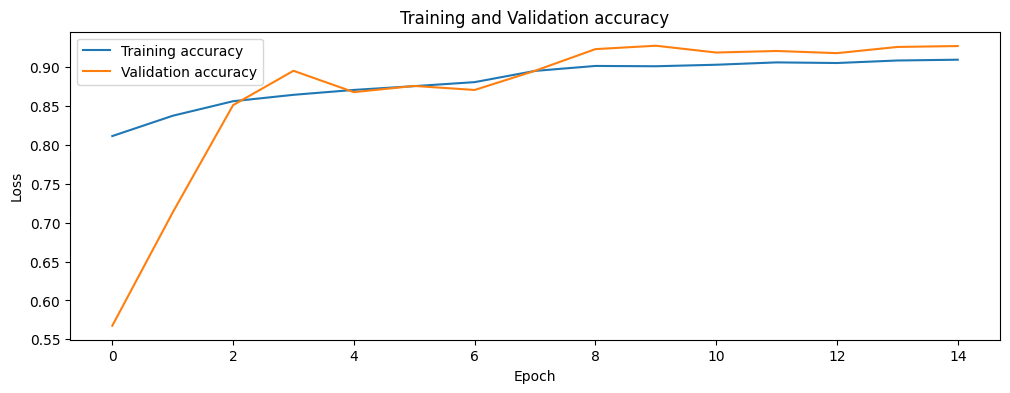

In [21]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation accuracy')
plt.show()

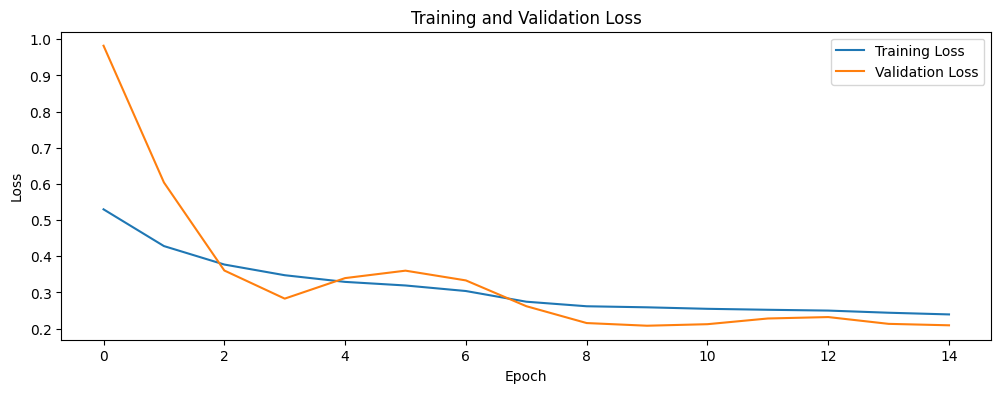

In [19]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

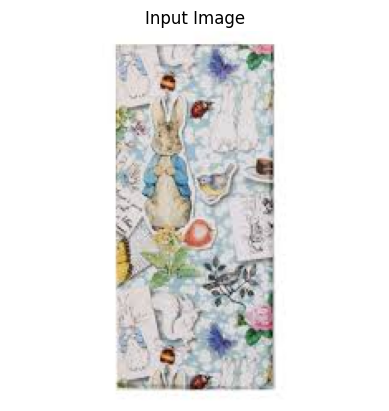

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 849ms/step
Raw model predictions: [[0.02588571 0.97411436]]
Predicted class index: 1
Predicted label: Recycling waste


In [28]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt


image_path = '/content/R_11109.jpg'


img = load_img(image_path, target_size=(224, 224))


img_array = img_to_array(img)


img_array = img_array / 255.0


img_batch = np.expand_dims(img_array, axis=0)


plt.imshow(img_array)
plt.title("Input Image")
plt.axis("off")
plt.show()


predictions = model.predict(img_batch)

print("Raw model predictions:", predictions)


predicted_class = np.argmax(predictions, axis=1)[0]


class_labels = {0: 'Organic Waste', 1: 'Recycling waste'}

print("Predicted class index:", predicted_class)
print("Predicted label:", class_labels.get(predicted_class, "Unknown"))


In [26]:
model.save('completed_waste_classification1.h5')